In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# P1 Lab 4.2


## 2. Programar RuidoBlanco

In [2]:
def RuidoBlanco1D(N, nf):
    def Xi(n, k, x):
        return 2**(n/2)*(np.logical_and(k*2**(-n)<=x, x<=2**(-n)*(k+1)).astype(int)-np.logical_and((k+1)*2**(-n)<=x, x<=2**(-n)*(k+2)).astype(int))
    
    alphas = np.random.normal(0,1,(nf, 2**(nf)-2))
    X = np.linspace(0,1,N)
    output = np.zeros(N)
    for n in range(nf):
        for k in range(2**n-2):
            output += alphas[n,k]*Xi(n,k,X)

    return output

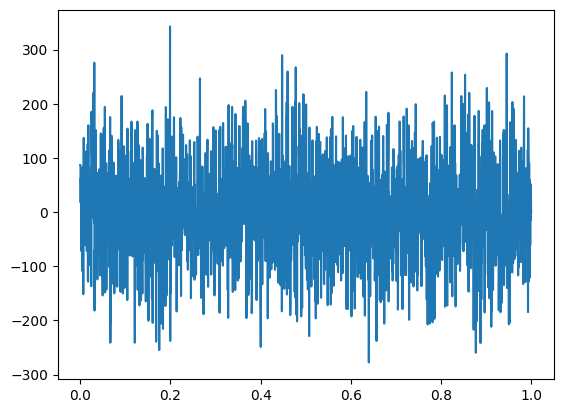

In [187]:
ruido = RuidoBlanco1D(10000, 12)
X = np.linspace(0,1,10000)
plt.plot(X,ruido)

In [216]:
def cinicial(n):
    a = []
    for _ in range(n**2):
        a.append([])

    for i in range(n):
        for k in range(n):
            a[i*n+k].append(i)
            a[i*n+k].append(k)
    return np.array(a)/n

In [189]:
def RuidoBlanco2D(N,nf):
    def Xi(n, k, x):
        return 2**(n/2)*(np.logical_and(k*2**(-n)<=x, x<=2**(-n)*(k+1)).astype(int)-np.logical_and((k+1)*2**(-n)<=x, x<=2**(-n)*(k+2)).astype(int))
    
    
    c = cinicial(N)
    output = np.zeros((N**2))
    X, Y = c[:,0], c[:,1]
    for n_p in range(nf):
        for k in range(2**nf-2):
            alphas = np.random.normal(0,1,N**2)
            output += alphas*(Xi(n_p,k,X)*Xi(n_p, k, Y))
    return output

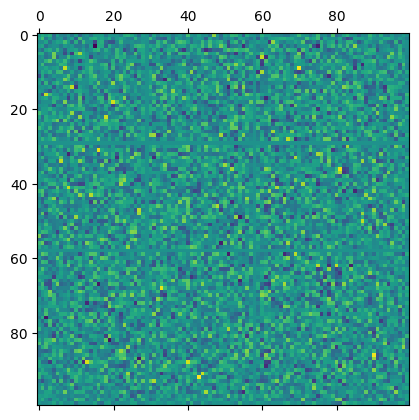

In [192]:
N = 100
r = RuidoBlanco2D(N,8)
r.shape
indices = (cinicial(N)*N).astype(int)
z = np.zeros((N,N))
for n in range(N**2):
    i,j = indices[n]
    z[i,j] = r[n]

plt.matshow(z)

In [9]:
r[66]

np.float64(288.219529883649)

In [193]:
def RuidoBlanco2D(N,nf):
    def Xi(n, k, x):
        return 2**(n/2)*(np.logical_and(k*2**(-n)<=x, x<=2**(-n)*(k+1)).astype(int)-np.logical_and((k+1)*2**(-n)<=x, x<=2**(-n)*(k+2)).astype(int))
    
    alphas = np.random.normal(0,1,(nf,nf, 2**(nf)-2, 2**(nf)-2))
    c = cinicial(N)
    X, Y = c[:,0], c[:,1]
    output = np.zeros((N**2))
    for n_p in range(nf):   
        for n in range(nf):
                for k in range(2**n-2):
                    for k_p in range(2**n_p -2):
                        output += alphas[n,n_p,k,k_p]*Xi(n,k,X)*Xi(n_p,k_p,Y)
    return output

In [70]:
RuidoBlanco2D(4,3)

array([ 2.73392869, -3.74206876, -2.73392869,  3.74206876, -1.6388451 ,
       -1.6388451 , -0.78641103, -0.78641103, -2.73392869, -2.73392869,
       -2.73392869,  3.74206876,  1.6388451 ,  1.6388451 ,  1.6388451 ,
        1.6388451 ])

In [44]:
a = cinicial(10)

In [217]:
def RuidoBlanco(N, nf, d):
    if d == 1:
        return RuidoBlanco1D(N, nf)
    else:
        return RuidoBlanco2D(N, nf)

## 4. Programar RuidoBlancoC

$$ A_k = \frac{1}{N}\sum_{n=0}^{N-1} a_n \exp\left(2\pi n i\frac{k}{N}\right) \quad k = 0, \dots , N-1 $$
Queremos calcular dados una sucesión $\alpha_n \sim N(0,1)$
$$ f(x) = \sum_{n=0}^{n_f} \alpha_n \exp\left(  2\pi i n x   \right) $$
Hacemos el c.v. $x = \frac{k}{N}$ con $k = 0, \dots , N-1$

In [189]:
def RuidoBlancoC1D(N):
    alphas = np.random.normal(0,1,(N)) + np.random.normal(0,1,(N)) * (0+1j)
    out = np.zeros(N, dtype=complex)
    out += np.fft.ifft(alphas)*N
    return out

np.float64(-1845.2532288793336)

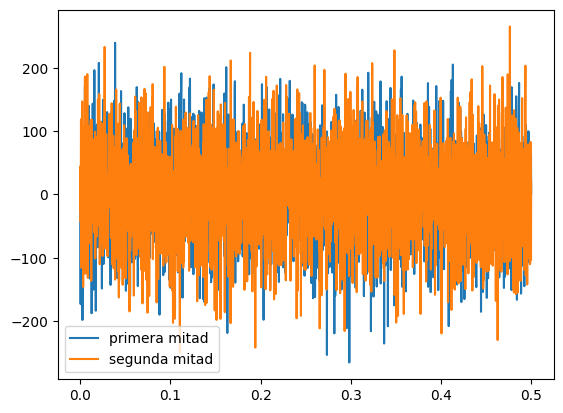

In [190]:
im = np.imag(RuidoBlancoC1D(5000))
x = np.linspace(0,1,5000)

plt.plot(x[0:2500], im[0:2500], label='primera mitad')
plt.plot(x[0:2500], im[2500:], label='segunda mitad')
plt.legend()
np.sum(im[0:2500] + im[2500:])


In [191]:
def integrate(F):
    T=np.linspace(0,1,len(F))
    I=np.sum([F[i]*(T[i+1]-T[i]) for i in range(len(F)-1)])
    return I

N=5000
M=2000
indicatriz = (np.linspace(0,1,N)<=1).astype(int)
samp_r= np.zeros(M)
samp_i = np.zeros(M)
for i in range(M):
    s = RuidoBlancoC1D(N)
    samp_r[i] = integrate(indicatriz * np.real(s))
    samp_i[i] = integrate(indicatriz * np.imag(s))
    print(f"{i}/{M}")

0/2000
1/2000
2/2000
3/2000
4/2000
5/2000
6/2000
7/2000
8/2000
9/2000
10/2000
11/2000
12/2000
13/2000
14/2000
15/2000
16/2000
17/2000
18/2000
19/2000
20/2000
21/2000
22/2000
23/2000
24/2000
25/2000
26/2000
27/2000
28/2000
29/2000
30/2000
31/2000
32/2000
33/2000
34/2000
35/2000
36/2000
37/2000
38/2000
39/2000
40/2000
41/2000
42/2000
43/2000
44/2000
45/2000
46/2000
47/2000
48/2000
49/2000
50/2000
51/2000
52/2000
53/2000
54/2000
55/2000
56/2000
57/2000
58/2000
59/2000
60/2000
61/2000
62/2000
63/2000
64/2000
65/2000
66/2000
67/2000
68/2000
69/2000
70/2000
71/2000
72/2000
73/2000
74/2000
75/2000
76/2000
77/2000
78/2000
79/2000
80/2000
81/2000
82/2000
83/2000
84/2000
85/2000
86/2000
87/2000
88/2000
89/2000
90/2000
91/2000
92/2000
93/2000
94/2000
95/2000
96/2000
97/2000
98/2000
99/2000
100/2000
101/2000
102/2000
103/2000
104/2000
105/2000
106/2000
107/2000
108/2000
109/2000
110/2000
111/2000
112/2000
113/2000
114/2000
115/2000
116/2000
117/2000
118/2000
119/2000
120/2000
121/2000
122/2000
123

In [192]:
import pandas as pd
data = pd.DataFrame(data={
    'parte real': samp_r,
    'parte imaginaria': samp_i
    }
)

Text(0.5, 1.0, 'Histograma integral RuidoBlancoC1D')

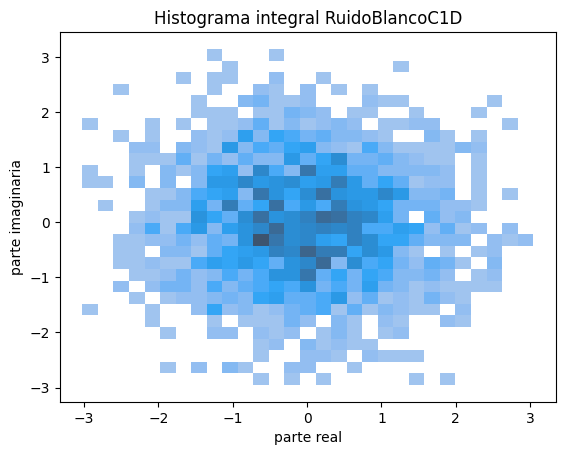

In [193]:
mod = np.sqrt(samp_r**2 + samp_i**2)
ax = sns.histplot(data, kde=True, x='parte real', y='parte imaginaria')
ax.set_title('Histograma integral RuidoBlancoC1D')

In [194]:
np.cov(np.array([samp_r, samp_i]))

array([[ 1.01775846, -0.03238178],
       [-0.03238178,  0.98653243]])

In [195]:
def RuidoBlancoC2D(N):
    alphas = np.random.normal(0,1,(N, N)) + np.random.normal(0,1,(N, N)) * (0+1j)
    out = np.zeros((N,N), dtype=complex)
    out += np.fft.fft2(alphas)*N**2
    return out

0/1000
1/1000
2/1000
3/1000
4/1000
5/1000
6/1000
7/1000
8/1000
9/1000
10/1000
11/1000
12/1000
13/1000
14/1000
15/1000
16/1000
17/1000
18/1000
19/1000
20/1000
21/1000
22/1000
23/1000
24/1000
25/1000
26/1000
27/1000
28/1000
29/1000
30/1000
31/1000
32/1000
33/1000
34/1000
35/1000
36/1000
37/1000
38/1000
39/1000
40/1000
41/1000
42/1000
43/1000
44/1000
45/1000
46/1000
47/1000
48/1000
49/1000
50/1000
51/1000
52/1000
53/1000
54/1000
55/1000
56/1000
57/1000
58/1000
59/1000
60/1000
61/1000
62/1000
63/1000
64/1000
65/1000
66/1000
67/1000
68/1000
69/1000
70/1000
71/1000
72/1000
73/1000
74/1000
75/1000
76/1000
77/1000
78/1000
79/1000
80/1000
81/1000
82/1000
83/1000
84/1000
85/1000
86/1000
87/1000
88/1000
89/1000
90/1000
91/1000
92/1000
93/1000
94/1000
95/1000
96/1000
97/1000
98/1000
99/1000
100/1000
101/1000
102/1000
103/1000
104/1000
105/1000
106/1000
107/1000
108/1000
109/1000
110/1000
111/1000
112/1000
113/1000
114/1000
115/1000
116/1000
117/1000
118/1000
119/1000
120/1000
121/1000
122/1000
123

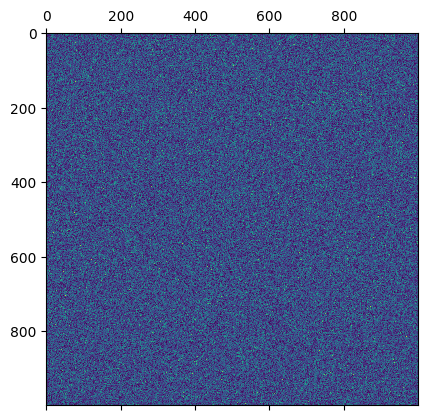

In [214]:
N = 100
M = 1000

# r.shape
# indices = (cinicial(N)*N).astype(int)
# z = np.zeros((N,N))
# for n in range(N**2):
#     i,j = indices[n]
#     z[i,j] = r[n]
i, j = np.indices((N,N))
indicatriz = (i<N//10)*(j<N//10)

plt.matshow(np.abs(r))
def integrate2D(r):
    N,M = r.shape
    return np.sum(r)/(M*N)

samp_r = np.zeros(M)
samp_i = np.zeros(M)
for _ in range(M):
    r = RuidoBlancoC2D(N)
    samp_r[_] = integrate2D(indicatriz * np.real(r))
    samp_i[_] = integrate2D(indicatriz* np.imag(r))
    print(f"{_}/{M}")

data = pd.DataFrame(data={
    'parte real': samp_r,
    'parte imaginaria': samp_i
    }
)

print(np.mean(samp_r))
print(np.cov(np.array([samp_r, samp_i])))

In [ ]:
def RuidoBlancoC(N, nf, d):
    if d == 1:
        return RuidoBlancoC1D(N, nf)
    else:
        return RuidoBlancoC2D(N, nf)

/home/nacho/simulab4/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/nacho/simulab4/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


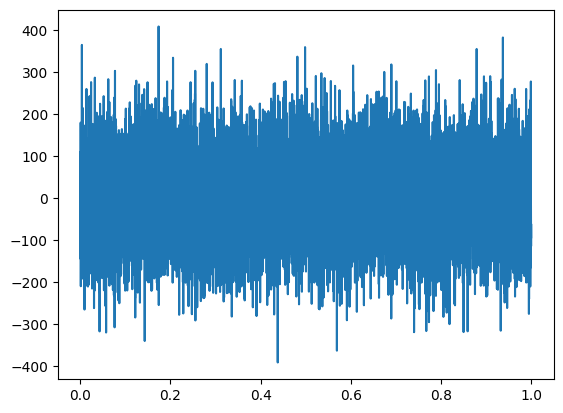

In [210]:
ruido = RuidoBlancoC1D(10000)
X = np.linspace(0,1,10000)
plt.plot(X,ruido)

## 6 Programar MovimientoBrownianoC

In [197]:
def MovimientoBrownianoC1D(N):
    alphas = np.random.normal(0,1,N) + np.random.normal(0, 1, N) * (0+1j)
    reciprocos = 1/(np.arange(1,N+1))
    out = np.fft.ifft(alphas*reciprocos)*N - np.sum(alphas*reciprocos)
    return out/(2 * np.pi * (0+1j))

$$ f_n(t) = \int_0^t \exp(2 \pi i n x)dx = \frac{1}{2\pi i n} \left(\exp(2 \pi i n x) -1\right)  $$

$$ \sum_{n=0}^{nf} \alpha_n f_n = \sum_{n=0}^{nf} \alpha_n  \frac{1}{2\pi i n} \left(\exp(2 \pi i n x) -1\right) $$

$$ = \frac{1}{2 \pi i}\sum_{n=0}^{nf} \frac{\alpha_n}{n} \exp(2 \pi i n x) - \frac{\alpha_n}{n} $$

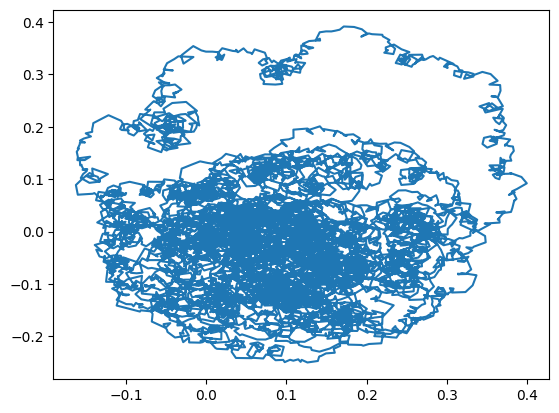

In [ ]:
B = MovimientoBrownianoC1D(100000)
re = np.real(B)
im = np.imag(B)
x = np.linspace(0,1, 100000)
plt.plot(re,im)

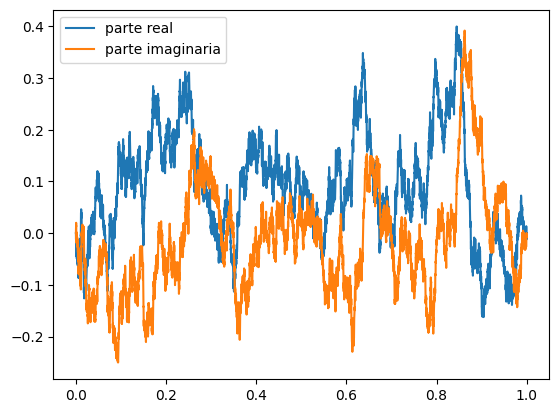

In [203]:
plt.plot(x,re, label='parte real')
plt.plot(x,im, label='parte imaginaria')
plt.legend()

In [204]:
def MovimientoBrownianoC2D(N):
    alphas = np.random.normal(0,1,(N,N)) + np.random.normal(0,1,(N,N)) * (0+1j)
    i_indices, j_indices = np.indices((N, N))  # Crear matrices de índices
    reciprocos = 1 / (i_indices + 1) * (j_indices + 1)  # Sumar 1 para evitar división por 0
    out = np.fft.ifft2(alphas*reciprocos)*N**2 - np.sum(alphas*reciprocos)
    return out/(2 * np.pi * (0+1j))

In [205]:
N = 10
alphas = np.random.normal(0,1,(N,N))
i_indices, j_indices = np.indices((N, N))  # Crear matrices de índices
reciprocos = 1 / ((i_indices + 1) * (j_indices + 1))  # Sumar 1 para evitar división por 0
(np.sum(alphas*reciprocos)).shape
# np.fft.ifft2(alphas*reciprocos*N).shape

()

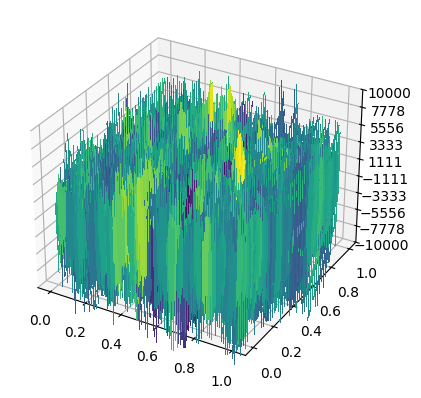

In [208]:
B2 = MovimientoBrownianoC2D(1000)


from matplotlib import cm
from matplotlib.ticker import LinearLocator

im = np.real(B2)
x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
x,y = np.meshgrid(x,y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x,y,im, cmap=cm.viridis, linewidth=0, antialiased=False)

ax.set_zlim(-10000,10000)
ax.zaxis.set_major_locator(LinearLocator(10))


In [313]:
def MovimientoBrownianoC(N, d):
    if d==1:
        return MovimientoBrownianoC1D(N)
    else:
        return MovimientoBrownianoC2D(N)

## P7

In [229]:
W = RuidoBlanco(100000, 13, 1)
B = np.cumsum(W)/100000

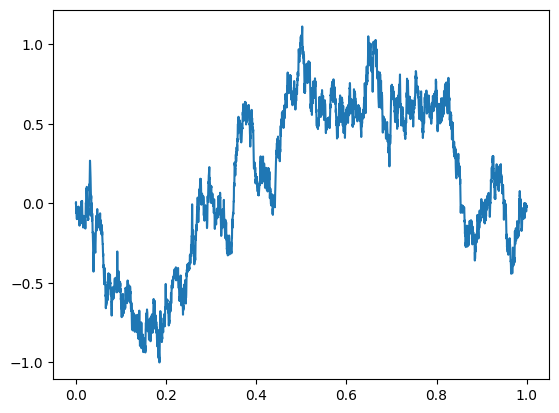

In [230]:
x = np.linspace(0,1,100000)
plt.plot(x,B)